In [1]:
#importing all the necessary libraries
import csv 
import numpy as np
import random
from random import randint
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#reading the csv data file. can also be done using panda
with open('data_2.csv') as csvfile:
    x_2=[]#list of all the x coordinates
    y_2=[]#list of all the y coordinates
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0].isdigit() == True: #removing x and y
            x_2.append(float(row[0]))
            y_2.append(float(row[1]))

In [3]:
#func to find shortest distance between two points
def Distance_Calc(x_p,y_p,x,y):
    dist = ((x_p-x)**2+(y_p-y)**2)**0.5 #formula to find the distance between any two points in cartesian coordinates
    return(dist)

In [4]:
#function to select random _X_points for testing
def Select_Random(x_2,test_x_2,n):
    for i in x_2:
        test_x_2.append(i)
    random.shuffle(test_x_2) #creating a random shuffled list of all the indices
    test_x_2 = test_x_2[:n]#selecting the first n numbers from that list
    return (test_x_2) #returning the randomly selected x coordinates of the parabola

In [5]:
#function to get the y coord of those random x points
def Test_y_Coord(x_2,y_2,test_x_2,test_y_2):
    for i in k:
        ind = x_2.index(i)
        test_y_2.append(y_2[ind])
    return (test_y_2)#returning the randomly selected y coordinates of the parabola

In [6]:
#making the new x_2 points
def New_x_Coord(l,b,d):
    for i in l:
        if i not in b:
            d.append(i)
    return(d) #returning the rest of the selected x coordinates NOT lying on the parabola

In [7]:
#making the new y_2 points
def New_y_Coord(x_2,y_2,f,new_y_2):
    for i in f:
        ind = x_2.index(i)
        new_y_2.append(y_2[ind])
    return (new_y_2)#returning the rest of the selected y coordinates NOT lying on the parabola

In [8]:
main_distance=[]#empty list which stores all the distances calculated below
main_k=[]#empty list which conatins all the main x coordinates selected for testing
main_g=[]#empty list which conatins all the main y coordinates selected for testing

In [9]:
for num in range(10000):  
    test_x_2=[] #empty list with this loops set of x coordinates for testing
    test_y_2=[]#empty list with this loops set of y coordinates for testing
    p=[]
    new_y_2=[] #empty list with new y coordinates for this loop
    distance=[]#empty list with the distance between the points on the parabola
    #chosen for testing and the outliers
    j=randint(5,99)#can use to select j points of x coordinates
    k = Select_Random(x_2,test_x_2,j) #selecting 99 points. Insert j for j times. Will change with every loop
    main_k.append(k) #adding to the main directory of k ' s'
    g = Test_y_Coord(x_2,y_2,test_x_2,test_y_2)
    main_g.append(g) #adding to the main directory of g ' s'
    f = New_x_Coord(x_2,k,p)#outlying set of x coordinates
    u = New_y_Coord(x_2,y_2,f,new_y_2)#outlying set of y coordinates
    for i in range(len(k)):
        d = Distance_Calc(k[i],g[i],f[i],u[i])#calculating the distance of every point
        distance.append(d)
    distance.sort()#ascending order of all distances
    
    #percentile calculation for determining the threshold of distance
    #have chosen 4 percentile here
    x = (1/100)*len(distance) #1th percentile
    x=math.ceil(x)#upper whole number integer value of the raank/cutoff
    
    #finding the lowest mean of distance
    sum=0
    for d in distance[:x]:
        sum+=d
    distance_mean=float(sum/len(distance))
    main_distance.append(distance_mean) #mean of all the distances

m = min(main_distance)
ind = main_distance.index(m) #index of the minimum distance 
print('---------------')
print('FINAL > ', m)
print(ind)
print('---------------')
print('K is ', main_k[ind])
print('---------------')
print('G is ', main_g[ind])
x_1=main_k[ind]#list of the x coordinates selected for making the parabola in this loop
y_1=main_g[ind]#list of the y coordinates selected for making the parabola in this loop

---------------
FINAL >  0.020202020202020204
1130
---------------
K is  [156.0, 258.0, 490.0, 356.0, 108.0, 32.0, 24.0, 4.0, 446.0, 402.0, 26.0, 422.0, 28.0, 338.0, 474.0, 416.0, 326.0, 174.0, 82.0, 164.0, 440.0, 424.0, 74.0, 102.0, 346.0, 436.0, 116.0, 464.0, 316.0, 246.0, 166.0, 110.0, 432.0, 306.0, 236.0, 130.0, 340.0, 114.0, 366.0, 344.0, 328.0, 332.0, 254.0, 382.0, 138.0, 100.0, 240.0, 172.0, 136.0, 46.0, 408.0, 342.0, 430.0, 404.0, 216.0, 230.0, 368.0, 126.0, 198.0, 84.0, 386.0, 470.0, 124.0, 222.0, 58.0, 122.0, 168.0, 494.0, 10.0, 476.0, 226.0, 454.0, 268.0, 18.0, 188.0, 250.0, 72.0, 228.0, 78.0, 472.0, 318.0, 6.0, 194.0, 248.0, 20.0, 294.0, 392.0, 396.0, 48.0, 310.0, 104.0, 456.0, 482.0, 390.0, 466.0, 354.0, 186.0, 336.0, 134.0]
---------------
G is  [47.92328727, 76.48884076, -44.89003018, 68.31642988, 35.59372013, -41.66845472, -36.80150051, -58.97612903, -14.73052498, 9.187654522, -20.0610459, 33.61402653, -33.91772007, 42.49992923, -50.16627159, 27.40376704, 54.06980071, 8

In [10]:
dic = dict(zip(x_1,y_1)) #dictionary with the x and y coordinates as keys and values

In [11]:
x_1 = sorted(dic.keys()) #sorting the x coordinates in ascending order

In [12]:
y_1 = [] #matching the y coordinates 
for i in range(len(x_1)):
    y_1.append(dic[x_1[i]])

In [13]:
#drawing the parabola

In [14]:
#error calculation
#all the tables that are necessary are written here 
x_1_p2 = []
xy = []
x_p2_y = []
x_1_p3 = []
x_1_p4 = []
#adding all elements to the list
for i in range(len(x_1)):
    x_1_p2.append(float(x_1[i]**2))
    xy.append(float(x_1[i]*y_1[i]))
    x_p2_y.append(float((x_1[i]**2)*y_1[i]))
    x_1_p3.append(float(x_1[i]**3))
    x_1_p4.append(float(x_1[i]**4))
#initializing all sums to zero
sum_n = 0.0
sum_x_1=0.0
sum_y_1=0.0
sum_x_1_p2 =0.0
sum_xy =0.0
sum_x_p2_y =0.0
sum_x_1_p3 = 0.0
sum_x_1_p4 =0.0
#finding all sums in the table
for i in range(len(x_1)):
    sum_n = sum_n + i
    sum_x_1=sum_x_1+x_1[i]
    sum_y_1=sum_y_1+y_1[i]
    sum_x_1_p2 =sum_x_1_p2 + x_1_p2[i]
    sum_xy =sum_xy+xy[i]
    sum_x_p2_y =sum_x_p2_y+x_p2_y[i]
    sum_x_1_p3 = sum_x_1_p3+x_1_p3[i]
    sum_x_1_p4 = sum_x_1_p4 + x_1_p4[i]

In [15]:
#three equations to find a b and c are >>> 

# sum_y_1 = a*sum_x_1_p2 + b*sum_x_1 + c*sum_n
# sum_xy = a*sum_x_1_p3 + b*sum_x_1_p2 + c*sum_x_1
# sum_x_p2_y = a*sum_x_1_p4 + b*sum_x_1_p3 + c*sum_x_1_p2

#written here just for a reference to the theory

In [16]:
a= np.array([[sum_x_1_p2,sum_x_1,sum_n],
             [sum_x_1_p3,sum_x_1_p2,sum_x_1],
             [sum_x_1_p4,sum_x_1_p3,sum_x_1_p2]])  #3X3 Matrix
b=np.array([sum_y_1,
            sum_xy,
            sum_x_p2_y])                           #3X1 Matrix

In [17]:
from numpy import linalg as LA
def Compute_Svd(A):                              #function definition for svd calculation
    AT=A.T                                       #transpose
    AAT=A.dot(AT)
    eigenvalue_U,eigenvector_U=LA.eig(AAT)
    sort_val1 = eigenvalue_U.argsort()[::-1]
    new_eigenvalue_U = eigenvalue_U[sort_val1]
    new_eigenvector_U = eigenvector_U[:,sort_val1]
    #temp = np.diag((np.sqrt(new_eigenvalue_U)))  #compute sigma matrix as a diagonal matrix with elements as square root of eigen values of U
    #sigma = np.zeros_like(A).astype(np.float64)
    #sigma[:temp.shape[0],:temp.shape[1]]=temp
    temp_1 = np.diag((np.sqrt((1/new_eigenvalue_U))))  #compute sigma matrix as a diagonal matrix with elements as square root of eigen values of U
    sigma_1 = np.zeros_like(A).astype(np.float64)
    sigma_1[:temp_1.shape[0],:temp_1.shape[1]]=temp_1
    VT_inter = sigma_1.dot(new_eigenvector_U.T)
    VT = VT_inter.dot(A)
    
    return new_eigenvector_U,sigma_1,VT

In [18]:
U,S_inv,VT = Compute_Svd(a)

In [19]:
sol_1 = VT.T.dot(S_inv.dot(U.T.dot(b)))
print("Co-efficients=",sol_1)
a = sol_1[0]
b = sol_1[1]
c = sol_1[2]

Co-efficients= [-0.00183976  0.8627293  -0.13586622]


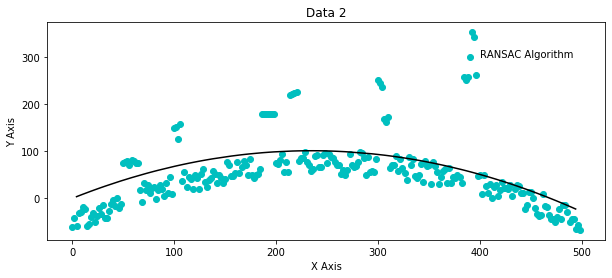

The loop ran  9999  times.


In [20]:
y_new=[] #new empty list of the y coordinates needed to draw the parabola

for i in range(0,len(x_1)):
    y = (a*(x_1[i]**2))+(b*x_1[i]) + c
    y_new.append(y)
    
fig = plt.figure(figsize=(10,4)) #empty figure
plt.xlabel('X Axis') #writing the x label
plt.ylabel('Y Axis') #writing the y label
plt.title('Data 2') #writing the Graph Title
plt.scatter(x_2,y_2,c='c')
plt.text(400,300,'RANSAC Algorithm')
plt.plot(x_1,y_new,'k') #drawing the black parabola
plt.show() #show the graph
print('The loop ran ', num,' times.') #indicating the number of times the iteration loop has run to get the best possible parabola

In [21]:
#the end